### RGYR

In [9]:
#Gather all the rgyr files in the pressure_$variable folders

from pathlib import Path
import shutil

# Source directory containing pressure_$variable folders
source_dir = Path("/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs")

destination_dir = source_dir / "rgyr"

# Loop through folders named pressure_$variable
for folder in source_dir.glob("pressure_*"):
    if folder.is_dir():

        # Copy .rgyr files to the existing 'rgyr' directory in each pressure_$variable folder
        for file in folder.glob("rgyr_*.rgyr.xvg"):
            shutil.copy(file, destination_dir)

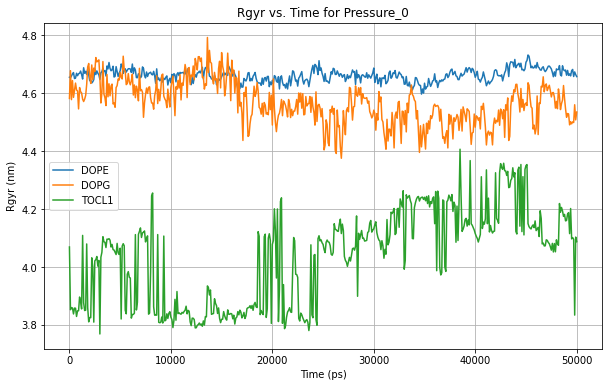

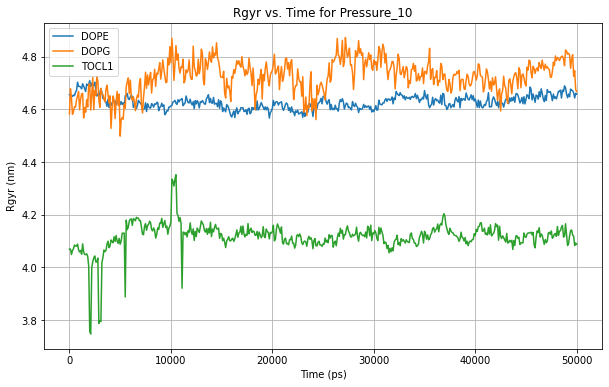

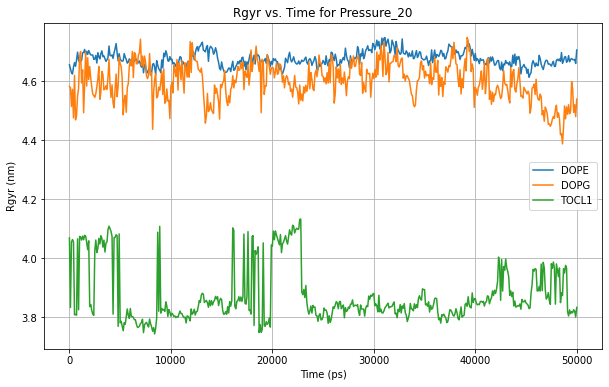

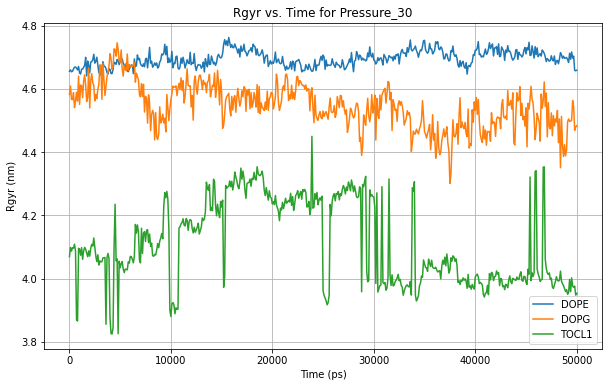

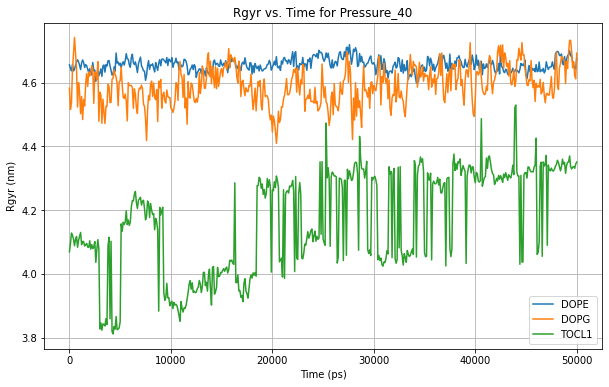

In [10]:
## Plot RGYR for each pressure 

import os
import numpy as np
import matplotlib.pyplot as plt

def plot_rgyr_for_pressure(folder_path, pressure):
    files_to_load = []

    # Find rgyr files for a specific pressure
    for file_name in os.listdir(folder_path):
        if file_name.startswith(f'rgyr_pressure_{pressure}_') and file_name.endswith('.rgyr.xvg'):
            file_path = os.path.join(folder_path, file_name)
            files_to_load.append(file_path)

    # Sort files before loading
    files_to_load.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Load data from the first file
    if files_to_load:
        data = np.loadtxt(files_to_load[0], comments=['#', '@'], usecols=(0, 1))

    # Load data from 2nd and subsequent files and concatenate columns
    for file_path in files_to_load[1:]:
        next_column = np.loadtxt(file_path, comments=['#', '@'], usecols=(1,))
        data = np.column_stack((data, next_column))

    # List of column names
    column_names = ['DOPE', 'DOPG', 'TOCL1']  

    # Plotting rgyr vs. time
    time = data[:, 0]  # First column is time
    rgyr_data = data[:, 1:]  # Columns containing rgyr data

    plt.figure(figsize=(10, 6))

    for i in range(rgyr_data.shape[1]):
        plt.plot(time, rgyr_data[:, i], label=column_names[i])

    plt.xlabel('Time (ps)')
    plt.ylabel('Rgyr (nm)')
    plt.title(f'Rgyr vs. Time for Pressure_{pressure}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/Figures/rgyr_pressure_{pressure}.png')
    plt.show()

# Plotting for each pressure
pressures = [0, 10, 20, 30, 40]
rgyr_folder_path = '/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/rgyr'  

for pressure in pressures:
    plot_rgyr_for_pressure(rgyr_folder_path, pressure)


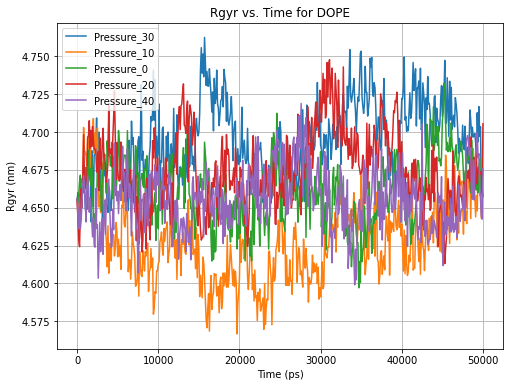

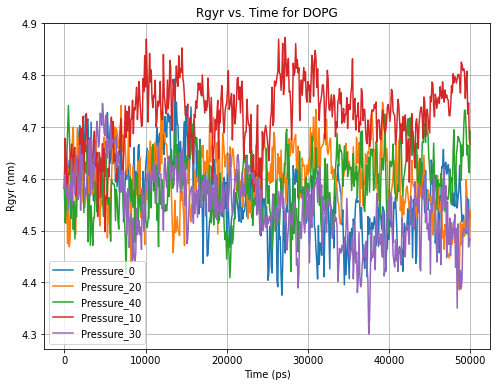

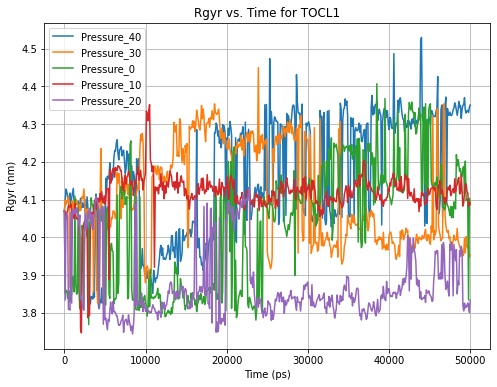

In [11]:
#Plot RGYR for each lipid

import os
import numpy as np
import matplotlib.pyplot as plt

rgyr_folder_path = '/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/rgyr'

# Get the list of files in the directory
file_list = os.listdir(rgyr_folder_path)

# Group files based on ending numbers 13, 14, and 15
files_13 = [file for file in file_list if '_13.rgyr.xvg' in file]
files_14 = [file for file in file_list if '_14.rgyr.xvg' in file]
files_15 = [file for file in file_list if '_15.rgyr.xvg' in file]

# Function to plot data 
def plot_and_save(files, title, save_name):
    plt.figure(figsize=(8, 6))
    for file in files:
        file_path = os.path.join(rgyr_folder_path, file)
        data = np.loadtxt(file_path, comments=['#', '@'], usecols=(0, 1))
        pressure_num = file.split('_')[2]
        plt.plot(data[:, 0], data[:, 1], label=f'Pressure_{pressure_num}')
    
    plt.xlabel('Time (ps)')
    plt.ylabel('Rgyr (nm)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/Figures/"+ save_name)  
    plt.show()

# Plotting data and saving figures 
plot_and_save(files_13, 'Rgyr vs. Time for DOPE', 'rgyr_DOPE.png')
plot_and_save(files_14, 'Rgyr vs. Time for DOPG', 'rgyr_DOPG.png')
plot_and_save(files_15, 'Rgyr vs. Time for TOCL1', 'rgyr_TOCL1.png')

### MSD

In [12]:
#Gather all the MSD files from the pressure_$variable folders

from pathlib import Path
import shutil

# Source directory containing pressure_$variable folders
source_dir = Path("/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs")

destination_dir = source_dir / "msd"

# Loop through folders named pressure_$variable
for folder in source_dir.glob("pressure_*"):
    if folder.is_dir():

        # Copy .rgyr files to the existing 'rgyr' directory in each pressure_$variable folder
        for file in folder.glob("msd_pressure_*_*.xvg"):
            shutil.copy(file, destination_dir)

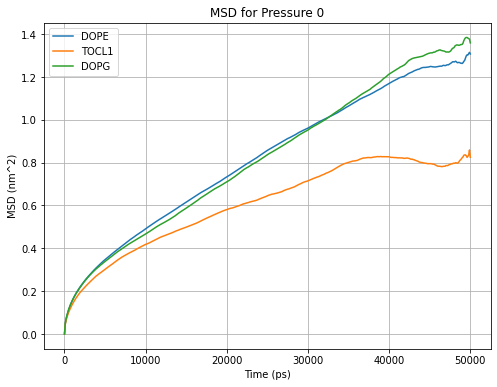

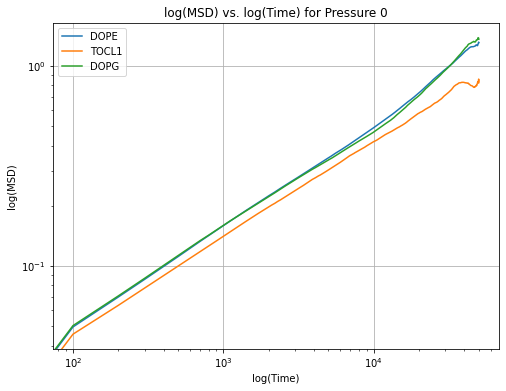

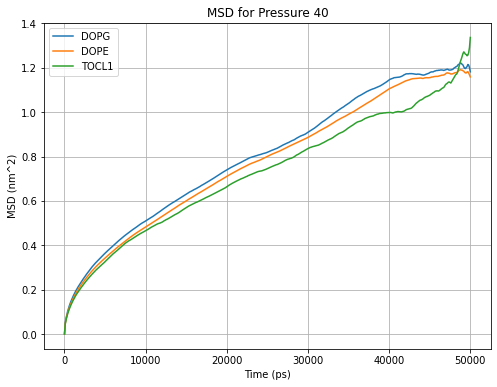

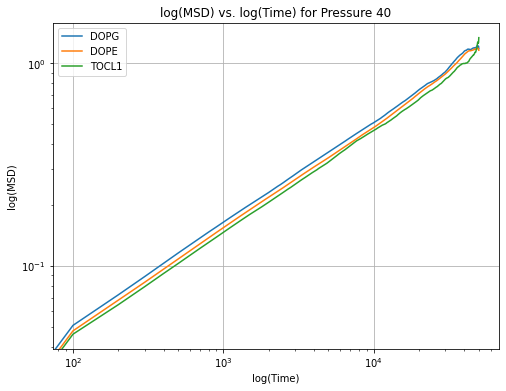

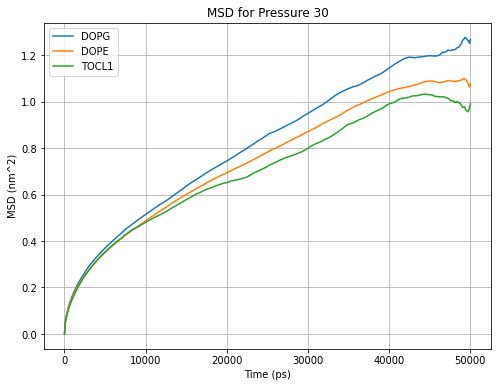

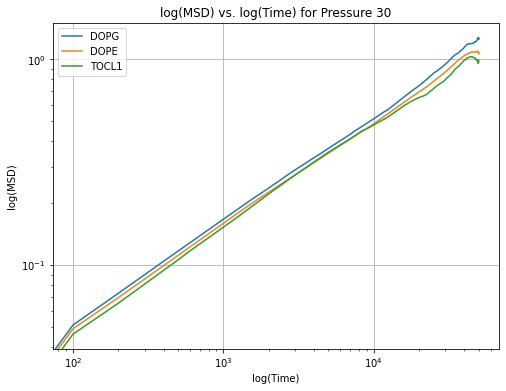

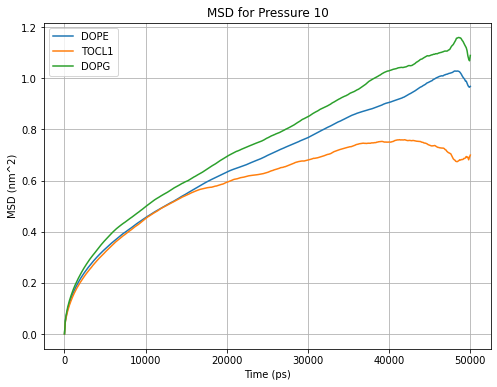

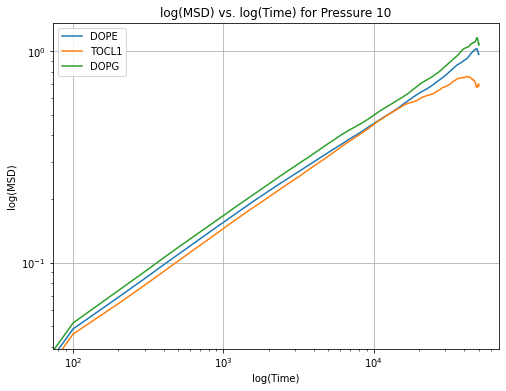

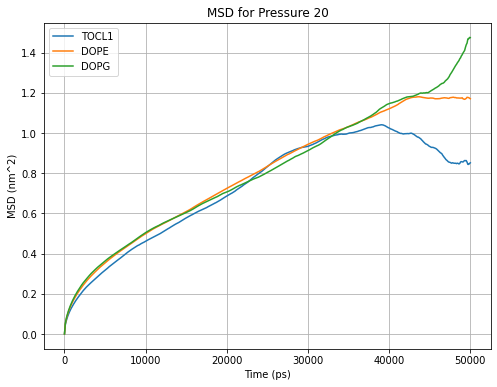

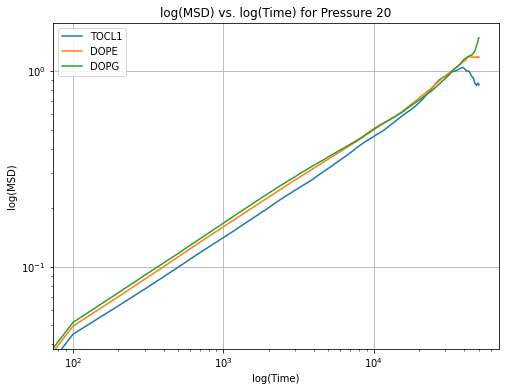

In [13]:
#Plot MSD for each pressure
import os
import numpy as np
import matplotlib.pyplot as plt

msd_folder_path = '/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/msd' 

# Get the list of files in the directory
file_list = os.listdir(msd_folder_path)

# Group files based on pressure and lipid type
file_groups = {}
for file_name in file_list:
    if file_name.startswith('msd_pressure_') and file_name.endswith('.xvg'):
        pressure = int(file_name.split('_')[2])
        lipid_type = int(file_name.split('_')[-1].split('.')[0])
        
        if pressure not in file_groups:
            file_groups[pressure] = {}
        file_groups[pressure][lipid_type] = os.path.join(msd_folder_path, file_name)

# Function to plot MSD for each pressure with legend labels 
def plot_msd_for_pressure_and_save(pressure_files, pressure):
    plt.figure(figsize=(8, 6))
    legend_labels = {13: 'DOPE', 14: 'DOPG', 15: 'TOCL1'}
    
    for lipid_type, file_path in pressure_files.items():
        data = np.loadtxt(file_path, comments=['#', '@'], usecols=(0, 1))
        plt.plot(data[:, 0], data[:, 1], label=legend_labels[lipid_type])

    plt.xlabel('Time (ps)')
    plt.ylabel('MSD (nm^2)')
    plt.title(f'MSD for Pressure {pressure}')
    plt.legend()
    plt.grid(True)
    
    # Save the figure as an image
    plt.savefig(f"/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/Figures/msd_pressure_{pressure}.png")
    plt.show()

# Function to plot MSD for each pressure with legend labels on a log-log scale 
def plot_msd_for_pressure_loglog_and_save(pressure_files, pressure):
    plt.figure(figsize=(8, 6))
    legend_labels = {13: 'DOPE', 14: 'DOPG', 15: 'TOCL1'}
    
    for lipid_type, file_path in pressure_files.items():
        data = np.loadtxt(file_path, comments=['#', '@'], usecols=(0, 1))
        plt.loglog(data[:, 0], data[:, 1], label=legend_labels[lipid_type])

    plt.xlabel('log(Time)')
    plt.ylabel('log(MSD)')
    plt.title(f'log(MSD) vs. log(Time) for Pressure {pressure}')
    plt.legend()
    plt.grid(True)
    
    # Save the figure as an image
    plt.savefig(f"/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/Figures/log_msd_pressure_{pressure}.png")
    plt.show()

# Plotting and saving both regular and log-log plots for each pressure group
for pressure, files in file_groups.items():
    plot_msd_for_pressure_and_save(files, pressure)
    plot_msd_for_pressure_loglog_and_save(files, pressure)


In [15]:
# MSD for each Lipid

import os
import numpy as np
import matplotlib.pyplot as plt

msd_folder_path = '/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/Solution/gromacs/msd'

# Get the list of files in the directory
file_list = os.listdir(msd_folder_path)

# Group files based on ending numbers 13, 14, and 15
files_13 = [file for file in file_list if '_13.xvg' in file]
files_14 = [file for file in file_list if '_14.xvg' in file]
files_15 = [file for file in file_list if '_15.xvg' in file]

# Function to plot data 
def plot_and_save(files, title, save_name):
    plt.figure(figsize=(8, 6))
    for file in files:
        file_path = os.path.join(msd_folder_path, file)
        data = np.loadtxt(file_path, comments=['#', '@'], usecols=(0, 1))
        pressure_num = file.split('_')[2]
        plt.plot(data[:, 0], data[:, 1], label=f'Pressure_{pressure_num}')
    
    plt.xlabel('Time (ps)')
    plt.ylabel('MSD (nm^2)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/Figures/"+ save_name)  
    plt.show()

# Plotting data and saving figures 
plot_and_save(files_13, 'MSD vs. Time for DOPE', 'msd_DOPE.png')
plot_and_save(files_14, 'MSD vs. Time for DOPG', 'msd_DOPG.png')
plot_and_save(files_15, 'MSD vs. Time for TOCL1', 'msd_TOCL1.png')

def plot_and_save_loglog(files, title, save_name):
    plt.figure(figsize=(8, 6))
    for file in files:
        file_path = os.path.join(msd_folder_path, file)
        data = np.loadtxt(file_path, comments=['#', '@'], usecols=(0, 1))
        pressure_num = file.split('_')[2]
        plt.loglog(data[:, 0], data[:, 1], label=f'Pressure_{pressure_num}')
    
    plt.xlabel('log(Time)')
    plt.ylabel('log(MSD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/charmm-gui-0285482339/gromacs/Figures/" + save_name)  
    plt.show()
    
# Plotting data and saving figures 
plot_and_save_loglog(files_13, 'log(MSD) vs. log(Time) for DOPE', 'log_msd_DOPE.png')
plot_and_save_loglog(files_14, 'log(MSD) vs. log(Time) for DOPG', 'log_msd_DOPG.png')
plot_and_save_loglog(files_15, 'log(MSD) vs. log(Time) for TOCL1', 'log_msd_TOCL1.png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/axe1/comp-lab-class/comp-lab-class-2023/FinalProj/Solution/gromacs/msd'